<a href="https://colab.research.google.com/github/TannerYork/LSTM-Energy-Consumption/blob/main/LSTM_Engery_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Engery Consumption


## Data Exploration/Preparation

### Loading the data

In [1]:
import pandas as pd

# load data into pandas data frame
dataset = pd.read_csv('LD2011_2014.txt', sep=';', low_memory=False, infer_datetime_format=True)

# fix time column naming and dtype
dataset.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)
dataset['datetime'] = dataset['datetime'].astype('datetime64[ns]')

# create a total energy consumtion column
dataset["total"] = dataset.drop(['datetime'], axis=1).sum(axis=1)

# remove data before 2012
dataset = dataset[dataset['datetime'] > f'2012-01-01']

# display the dataset
print(dataset.shape)
dataset.tail()

(105216, 372)


,datetime,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,...,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,total
140251,2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182","72,0430107526882","71,5350223546945","168,085106382979","35,6550580431177","50,4148053605616","65,599173553719","84,8519362186788","82,659478885894","357,827476038339","13,0653266331658","63,4361233480176","193,717277486911","31,1332503113325","18,4696569920844","49,3827160493827","322,429906542056","38,9830508474576","48,1120584652862","140,519730510106","78,8979336255479","58,7803085966201","141,447368421053","30,2171860245515","64,2737896494157","29,3296089385475","181,434599156118","10,3270223752151","162,47582205029","120,418848167539","59,7232337946103",...,"54,7147846332945","53,0927835051546","19,5573854863613","41,0466906105695","96,4566929133858","138,297413793103","268,398268398268","1747,9674796748","41,025641025641","664,987405541562","72,0980533525595","31,9018404907975","52,7230590961761","980,676328502415","220,081135902637",0,"40,6917599186165","115,191146881288","174,129353233831","635,555555555556","23,2558139534884","170,622193713919","25,0501002004008","273,972602739726","16,4728682170543","833,333333333333","217,703349282297","29,9145299145299","206,140350877193","276,945039257673",28200.0,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162",28200.0
140252,2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147","72,0430107526882","67,0640834575261","165,957446808511","34,8258706467662","48,5003190810466","62,5","74,0318906605923","80,8625336927224","341,85303514377","12,5628140703518","75,7709251101322","191,099476439791","34,2465753424658","19,1292875989446","50,0685871056241","317,757009345794","41,5254237288136","38,9768574908648","136,669874879692","75,1408891671885","57,3108008817046","141,447368421053","32,1057601510859","71,7863105175292","30,0279329608939","177,215189873418","8,60585197934596","156,673114119923","115,183246073298","53,1682447195921",...,"53,5506402793946","54,639175257732","15,4400411734431","32,8373524884556","79,7244094488189","137,219827586207","246,753246753247","1734,9593495935","40,2930402930403","664,987405541562","73,5400144196107","32,5153374233129","51,5643105446118","995,169082125604","216,024340770791",0,0,"109,154929577465","174,129353233831","635,555555555556","23,2558139534884","169,980756895446","26,0521042084168","275,494672754947","16,4728682170543","825,757575757576","218,500797448166","28,4900284900285","192,982456140351","279,800142755175",28300.0,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027",28300.0
140253,2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112","74,1935483870968","65,5737704918033","170,212765957447","39,8009950248756","47,8621569878749","62,5","76,879271070615","80,8625336927224","341,85303514377","11,5577889447236","64,3171806167401","198,952879581152","36,1145703611457","16,490765171504","49,3827160493827","327,102803738318","3

### Exploring the data

#### MatplotLib Setup

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#### Total Energy Consumption Trends
Here we look at how the overall data changes and how the data changes over years, months, and days.

Findings:
*   The data appreas fairly consistant throughout years, months, and days
*   While year and month periods appear stationarry, consumption over one day appear like they are not not

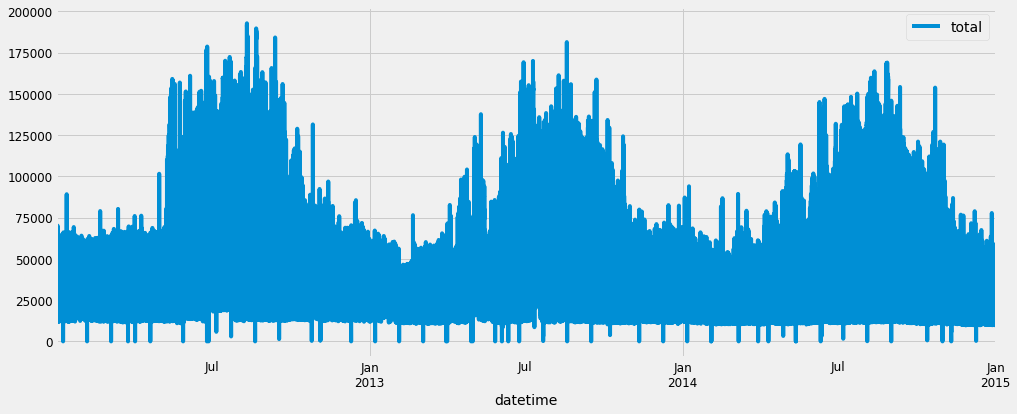

In [3]:
dataset[['datetime', 'total']].plot(x='datetime', figsize=(15, 6))
plt.show()

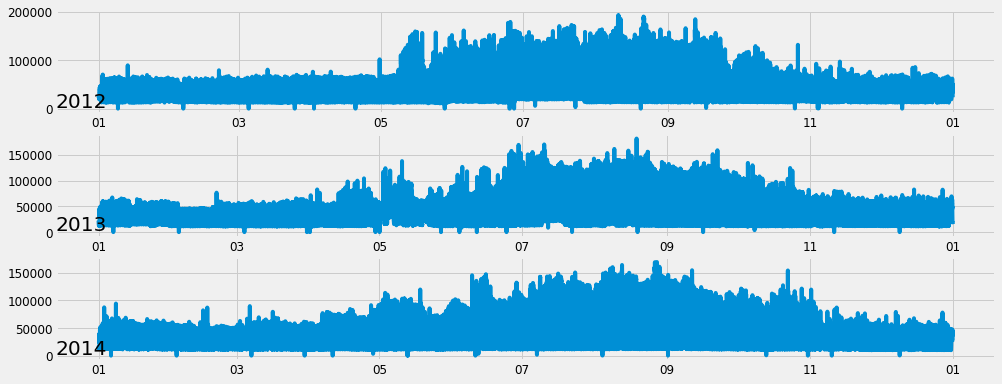

In [4]:
from matplotlib.dates import DateFormatter

years = ['2012', '2013', '2014']
plt.figure(figsize=(15, 6))
for i in range(len(years)):
  ax = plt.subplot(len(years), 1, i+1)
  year = years[i]
  results = dataset[(dataset['datetime'] > f'{year}-01-01') & (dataset['datetime'] < f'{str(int(year)+1)}-01-01')]
  plt.plot(results['datetime'], results['total'])
  plt.title(str(year), y=0, loc='left')
  date_form = DateFormatter("%m")
  ax.xaxis.set_major_formatter(date_form)
plt.show()

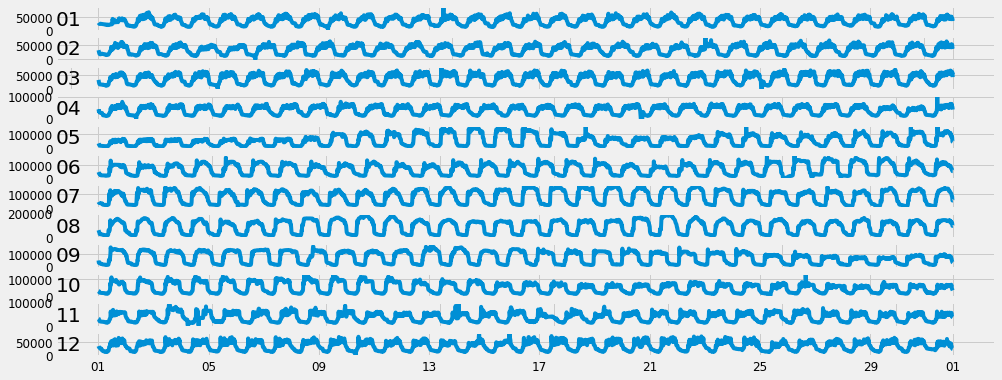

In [5]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.figure(figsize=(15, 6))
for i in range(len(months)):
  ax = plt.subplot(len(months), 1, i+1)
  month = months[i]

  if month <= '08':
    results = dataset[(dataset['datetime'] > f'2012-{month}-01') & (dataset['datetime'] < f'2012-0{str(int(month)+1)}-01')]
  elif month < '12':
    results = dataset[(dataset['datetime'] > f'2012-{month}-01') & (dataset['datetime'] < f'2012-{str(int(month)+1)}-01')]
  else:
    results = dataset[(dataset['datetime'] > f'2012-12-01') & (dataset['datetime'] < f'2013-01-01')]

  plt.plot(results['datetime'], results['total'])
  plt.title(str(month), y=0, loc='left')

  date_form = DateFormatter("%d")
  ax.xaxis.set_major_formatter(date_form)
plt.show()

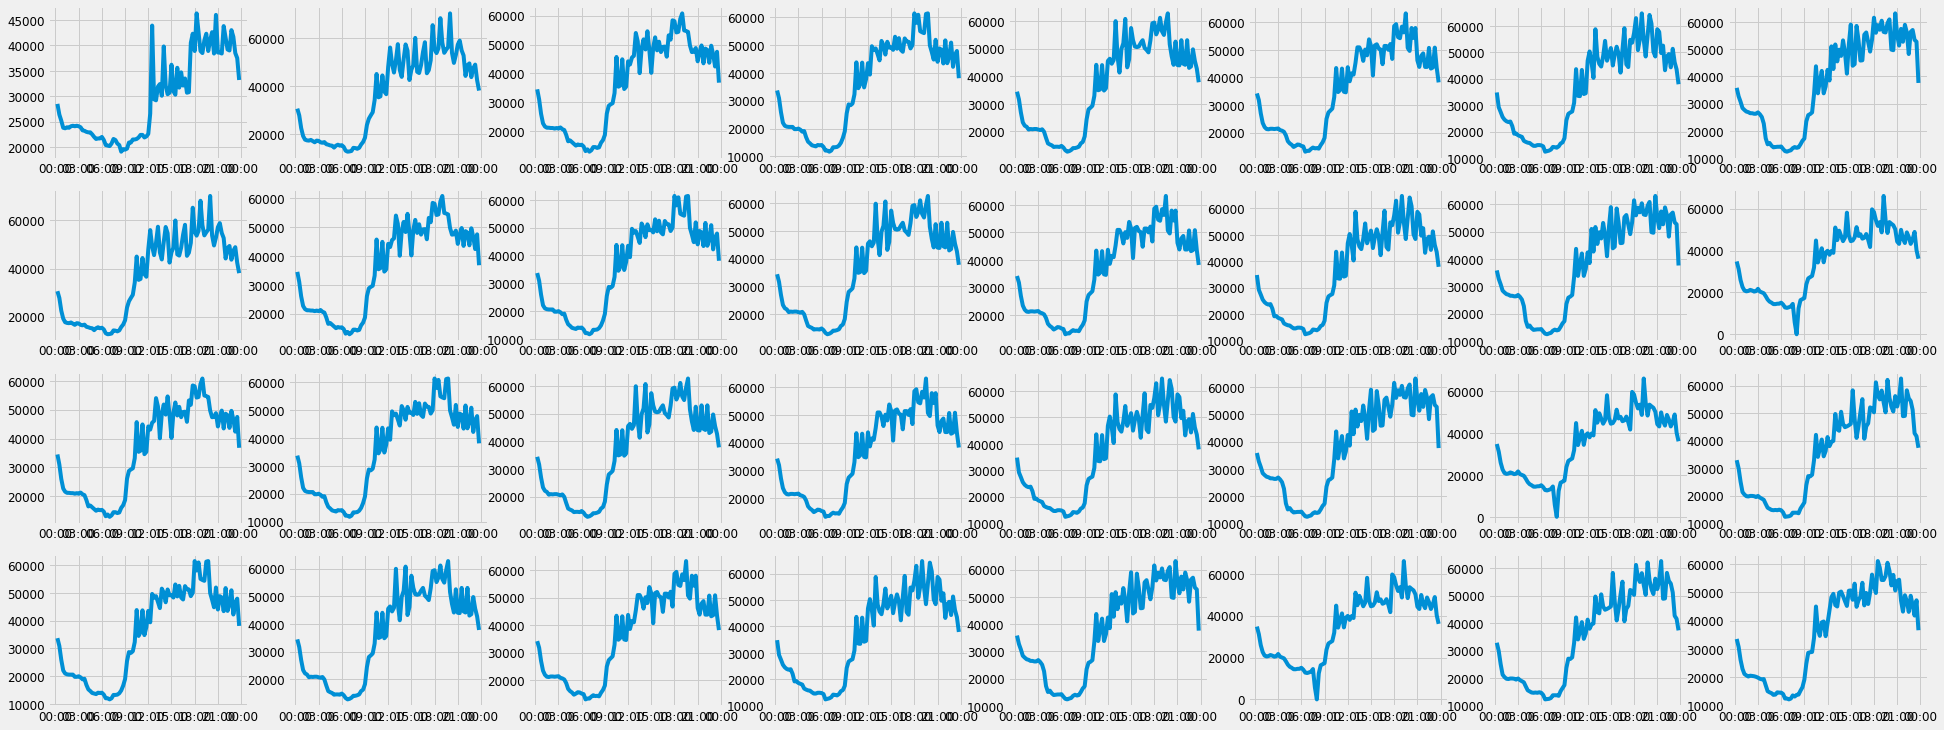

In [6]:
fig, axs = plt.subplots(4, 8, figsize=(30, 12))
for i in range(4):
  for j in range(8):
    ax = axs[i, j]

    if (i+j) <= 6:
      results = dataset[(dataset['datetime'] > f'2012-01-0{(i+j)+1}') & (dataset['datetime'] < f'2012-01-0{(i+j)+2}')]
    elif (i+j) < 30:
      results = dataset[(dataset['datetime'] > f'2012-01-{(i+j)+1}') & (dataset['datetime'] < f'2012-01-{(i+j)+2}')]
    else:
      results = dataset[(dataset['datetime'] > f'2012-01-30') & (dataset['datetime'] < f'2013-01-31')]

    ax.plot(results['datetime'], results['total'])

    date_form = DateFormatter("%H:%M")
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(date_form)
plt.show()

#### Total Engery Distrobutions
Here we check if the data's distrobution.

Findings:
*   Data apears to have a bimodal distrobution


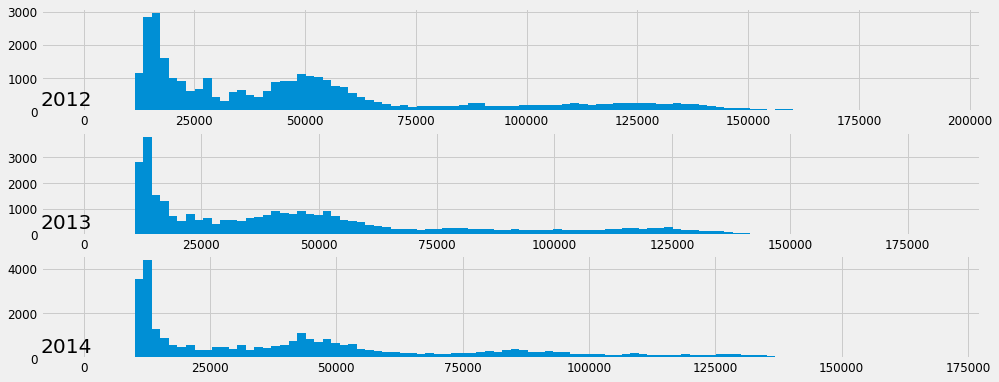

In [7]:
from matplotlib.dates import DateFormatter

years = ['2012', '2013', '2014']
plt.figure(figsize=(15, 6))
for i in range(len(years)):
  ax = plt.subplot(len(years), 1, i+1)
  year = years[i]
  results = dataset[(dataset['datetime'] > f'{year}-01-01') & (dataset['datetime'] < f'{str(int(year)+1)}-01-01')]
  plt.hist(results['total'], bins=100)
  plt.title(str(year), y=0, loc='left')
plt.show()

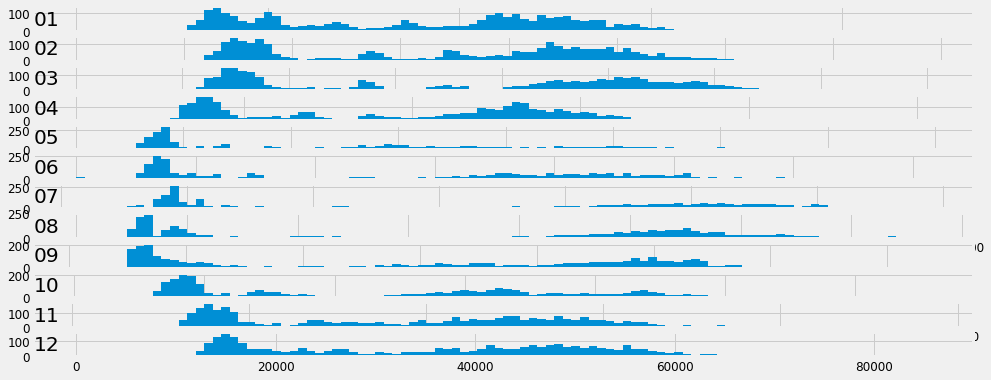

In [8]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.figure(figsize=(15, 6))
for i in range(len(months)):
  ax = plt.subplot(len(months), 1, i+1)
  month = months[i]

  if month <= '08':
    results = dataset[(dataset['datetime'] > f'2012-{month}-01') & (dataset['datetime'] < f'2012-0{str(int(month)+1)}-01')]
  elif month < '12':
    results = dataset[(dataset['datetime'] > f'2012-{month}-01') & (dataset['datetime'] < f'2012-{str(int(month)+1)}-01')]
  else:
    results = dataset[(dataset['datetime'] > f'2012-12-01') & (dataset['datetime'] < f'2013-01-01')]

  plt.hist(results['total'], bins=100)
  plt.title(str(month), y=0, loc='left')
plt.show()

#### Observation Relationships
Here we check use a lag scatter plot to see if the is positive correlation between observations.

Findings:
*   There is a positive realtion overall

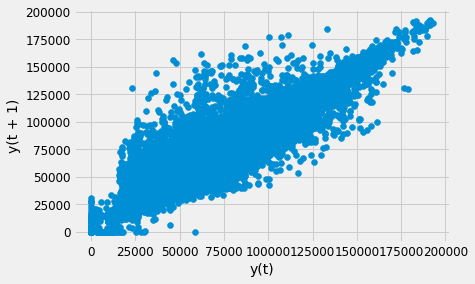

In [9]:
pd.plotting.lag_plot(dataset['total'])

### Preparing the data

In [10]:
import numpy as np

hourly_groups = dataset.drop(columns=['total'], axis=1).resample('H', on='datetime')
hourly_data = hourly_groups.sum()
print(hourly_data.shape)
hourly_data.head()

(26305, 1)


,MT_362
datetime,
2012-01-01 00:00:00,80100.0
2012-01-01 01:00:00,95200.0
2012-01-01 02:00:00,96600.0
2012-01-01 03:00:00,94500.0
2012-01-01 04:00:00,91300.0


In [11]:
split_fraction = 0.715
train_split = int(split_fraction * int(hourly_data.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10

def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

features = hourly_data[["MT_362"]]
print(features.head())

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
print(features.head())

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

                      MT_362
datetime                    
2012-01-01 00:00:00  80100.0
2012-01-01 01:00:00  95200.0
2012-01-01 02:00:00  96600.0
2012-01-01 03:00:00  94500.0
2012-01-01 04:00:00  91300.0
          0
0 -0.824137
1 -0.719753
2 -0.710075
3 -0.724592
4 -0.746713


In [12]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]

sequence_length = int(past / step)

from keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,)

In [13]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(1)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 1)
Target shape: (256, 1)


## Model Development

#### LSTM Model 1

In [14]:
from keras import layers, Model, optimizers

inputs = layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = layers.LSTM(32)(inputs)
outputs = layers.Dense(1)(lstm_out)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras import callbacks

path_checkpoint = "model_1_checkpoint.h5"
es_callback = callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],)

Epoch 1/10
71/71 [==============================] - 13s 152ms/step - loss: 0.8712 - val_loss: 1.0277

Epoch 00001: val_loss improved from inf to 1.02772, saving model to model_1_checkpoint.h5
Epoch 2/10
71/71 [==============================] - 10s 142ms/step - loss: 0.7168 - val_loss: 0.9075

Epoch 00002: val_loss improved from 1.02772 to 0.90751, saving model to model_1_checkpoint.h5
Epoch 3/10
71/71 [==============================] - 10s 144ms/step - loss: 0.6381 - val_loss: 0.7122

Epoch 00003: val_loss improved from 0.90751 to 0.71220, saving model to model_1_checkpoint.h5
Epoch 4/10
71/71 [==============================] - 10s 144ms/step - loss: 0.4772 - val_loss: 0.3477

Epoch 00004: val_loss improved from 0.71220 to 0.34767, saving model to model_1_checkpoint.h5
Epoch 5/10
71/71 [==============================] - 10s 144ms/step - loss: 0.2920 - val_loss: 0.2619

Epoch 00005: val_loss improved from 0.34767 to 0.26187, saving model to model_1_checkpoint.h5
Epoch 6/10
71/71 [======

#### LSTM Model 2

In [16]:
from keras import layers, Model, optimizers

inputs = layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = layers.LSTM(64)(inputs)
outputs = layers.Dense(1)(lstm_out)

model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss="mse")
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras import callbacks

path_checkpoint = "model_1_checkpoint.h5"
es_callback = callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,)

history = model2.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],)

Epoch 1/10
71/71 [==============================] - 22s 286ms/step - loss: 0.8377 - val_loss: 0.9832

Epoch 00001: val_loss improved from inf to 0.98319, saving model to model_1_checkpoint.h5
Epoch 2/10
71/71 [==============================] - 20s 282ms/step - loss: 0.6839 - val_loss: 0.8224

Epoch 00002: val_loss improved from 0.98319 to 0.82236, saving model to model_1_checkpoint.h5
Epoch 3/10
71/71 [==============================] - 20s 284ms/step - loss: 0.5503 - val_loss: 0.5373

Epoch 00003: val_loss improved from 0.82236 to 0.53731, saving model to model_1_checkpoint.h5
Epoch 4/10
71/71 [==============================] - 20s 283ms/step - loss: 0.3432 - val_loss: 0.4260

Epoch 00004: val_loss improved from 0.53731 to 0.42603, saving model to model_1_checkpoint.h5
Epoch 5/10
71/71 [==============================] - 20s 284ms/step - loss: 0.2628 - val_loss: 0.2096

Epoch 00005: val_loss improved from 0.42603 to 0.20963, saving model to model_1_checkpoint.h5
Epoch 6/10
71/71 [======

## Model Evaluation

#### Results Plot

In [18]:
import matplotlib.pyplot as plt

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

#### LSTM Model 1

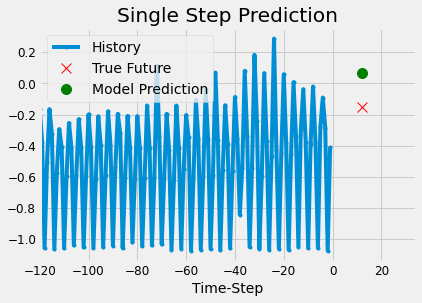

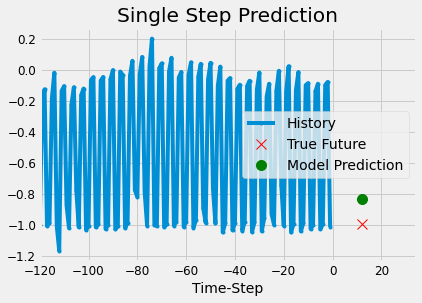

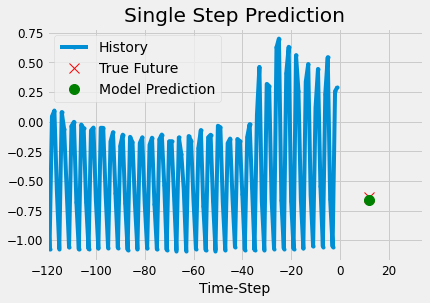

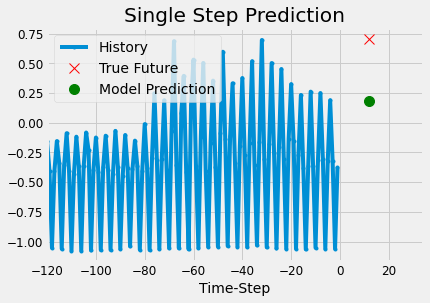

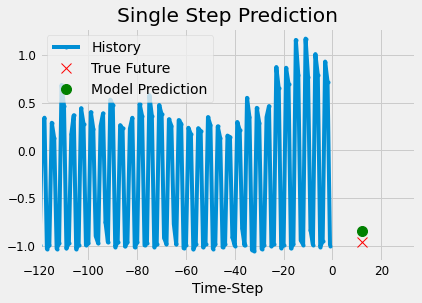

In [19]:
for x, y in dataset_val.take(5):
    show_plot( [x[0][:, 0].numpy(), y[0].numpy(), model.predict(x)[0]], 12,
              "Single Step Prediction",)

#### LSTM Model 2

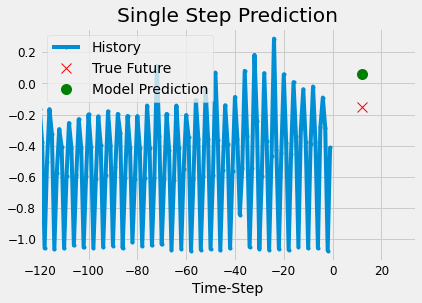

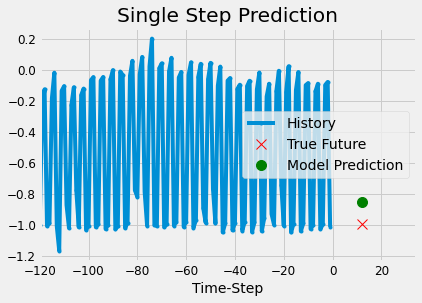

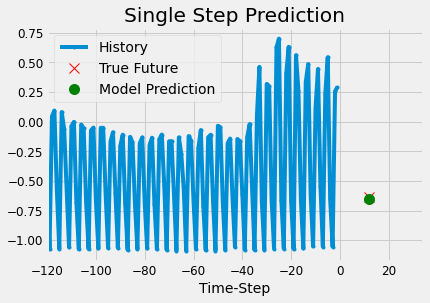

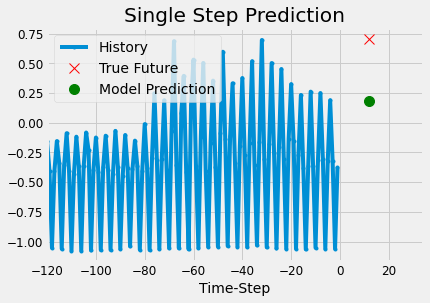

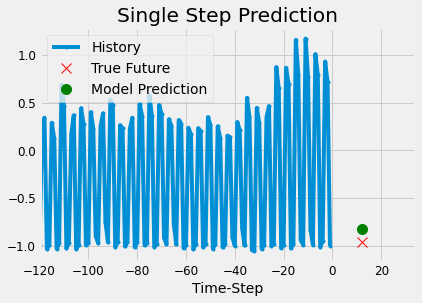

In [21]:
for x, y in dataset_val.take(5):
    show_plot( [x[0][:, 0].numpy(), y[0].numpy(), model2.predict(x)[0]], 12,
              "Single Step Prediction",)